In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
N = 1000

In [5]:
ip = np.random.randn(N)>0

In [6]:
#bpsk_modulation
s = 2 * ip - 1
s = np.array(s)


In [7]:
eb_no_db = np.arange(25)

In [8]:
bit_error_rate = np.zeros(len(eb_no_db)) 

In [11]:
def equal_gain_combining():
    
    bit_error_rate = np.zeros(len(eb_no_db))

    for jj in range(len(eb_no_db)):
        
        nErr = 0

        for ii in range(N):
            
            h11 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            h21 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            n11 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            n21 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            x = s[ii]
            
            H = np.array([[h11], [h21]])
            
            n = np.array([[n11], [n21]])
            
            y = np.dot(H, x) + n * (10 ** (-eb_no_db[jj] / 20))
            
            phase_compenstate = np.exp(-1j * np.angle(H))
            
            print(phase_compenstate)
            
            print(y)
            
            equalize_received_signal = np.dot(phase_compenstate,y)
            
            decoded_bits = (equalize_received_signal.real > 0).astype(int)

            nErr += np.sum(decoded_bits != ip)  # Accumulate errors for each iteration

        bit_error_rate[jj] = nErr / N  # Calculate bit error rate for the current SNR

    return bit_error_rate


In [12]:
result = equal_gain_combining()
print(result)
plt.figure()
plt.semilogy(eb_no_db, result, 'mo-', linewidth=2, markersize=8, label='nTx=2 nRx=2 (equal_gain)')

# plt.axis([0, 30, 1e-5, 0.1])
plt.grid(True)
plt.legend()
plt.xlabel('Eb/No, dB')
plt.ylabel('Bit Error Rate')
plt.title('BER for BPSK modulation with zero_forcing_algorithm')
plt.show()

[[0.40298765-0.91520542j]
 [0.59267377-0.80544261j]]
[[0.25801794-0.28168302j]
 [0.25520137-0.42662179j]]


ValueError: shapes (2,1) and (2,1) not aligned: 1 (dim 1) != 2 (dim 0)

In [24]:
import matplotlib.pyplot as plt
import numpy as np

N = 1000
# ip= np.random.randn(N)>0
ip = np.random.randn(0, 4, N)  # QPSK modulation

qpsk_mapping = {
    0: 1 + 1j,
    1: -1 + 1j,
    2: -1 - 1j,
    3: 1 - 1j
}
s = np.array([qpsk_mapping[i] for i in ip])

eb_no_db = np.arange(-10,30)

bit_error_RxMF = np.zeros(len(eb_no_db))
bit_error_RxZF = np.zeros(len(eb_no_db))
bit_error_RxWF = np.zeros(len(eb_no_db))


def RxMF():

    for jj in range(len(eb_no_db)):

        nErr = 0

        equalize_bits = []

        for ii in range(N // 2):

            h11 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            h12 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            h21 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            h22 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())

            H = np.array([[h11, h21],
                          [h21, h22]])

            n1 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            n2 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            n = np.array([[n1],
                          [n2]])

            x1 = s[2 * ii]
            x2 = s[2 * ii + 1]
            x = np.array([[x1],
                          [x2]])

            y = np.dot(H, x) + n * (10 ** (-eb_no_db[jj] / 20))

            # forming pseudo inverse for zero forcing
            H_conjugate = np.conjugate(H)
            H_hermitian = np.transpose(H_conjugate)
            covariance_of_signal_Rs = np.eye(2)
            covariance_of_noise_Rn = 10 ** (-eb_no_db[jj] / 10) * np.eye(2)
            inverse_covariance_of_noise = np.linalg.inv(covariance_of_noise_Rn)
            transmit_filter_Prx = np.eye(2)
            transmit_filter_hermitian = np.conjugate(transmit_filter_Prx)
            transmit_filter_hermitian = np.transpose(transmit_filter_hermitian)
            alpha = 2
            W = alpha * covariance_of_signal_Rs @ transmit_filter_hermitian @ H_hermitian @ inverse_covariance_of_noise
            x_hat = np.dot(W, y)
            
            received_symbols = np.angle(x_hat) / (np.pi / 4)
            
            received_bits = np.floor((received_symbols + 1) / 2).astype(int)
            
            equalize_bits.extend(received_bits.flatten())

        nErr = np.sum(ip != equalize_bits)
        bit_error_RxMF[jj] = nErr / N

    return bit_error_RxMF


In [25]:
RxMF = RxMF()
print(RxMF)

plt.figure()
plt.semilogy(eb_no_db, RxMF, 'ko-', linewidth=2, markersize=4, label='nTx=2 nRx=2 (RxMF)')
# plt.semilogy(eb_no_db, RxZF, 'ro-', linewidth=2, markersize=4, label='nTx=2 nRx=2 (RxZF)')
# plt.semilogy(eb_no_db, RxWF, 'go-', linewidth=2, markersize=4, label='nTx=2 nRx=2 (RxWF)')
plt.grid(True)
plt.legend()
plt.xlabel('Eb/No, dB')
plt.ylabel('Bit Error Rate')
plt.title('BER for BPSK modulation with zero_forcing_algorithm')
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

[0.603 0.601 0.611 0.588 0.555 0.554 0.554 0.528 0.534 0.537 0.539 0.536
 0.519 0.528 0.524 0.518 0.522 0.518 0.533 0.524 0.518 0.529 0.502 0.517
 0.521 0.522 0.526 0.523 0.519 0.52  0.508 0.517 0.511 0.516 0.516 0.515
 0.516 0.518 0.517 0.518]


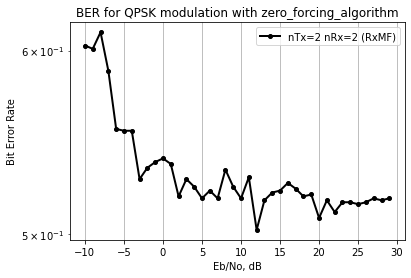

In [28]:
import matplotlib.pyplot as plt
import numpy as np

N = 1000
ip = np.random.randn(N) > 0
# ip = np.random.randint(0, 4, N)  # QPSK modulation
qpsk_mapping = {
    0: 1 + 1j,
    1: -1 + 1j,
    2: -1 - 1j,
    3: 1 - 1j
}
s = np.array([qpsk_mapping[i] for i in ip])
eb_no_db = np.arange(-10,30)

bit_error_RxMF = np.zeros(len(eb_no_db))
bit_error_RxZF = np.zeros(len(eb_no_db))
bit_error_RxWF = np.zeros(len(eb_no_db))


def RxMF():

    for jj in range(len(eb_no_db)):

        nErr = 0

        equalize_bits = []

        for ii in range(N // 2):

            h11 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            h12 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            h21 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            h22 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())

            H = np.array([[h11, h21],
                          [h21, h22]])

            n1 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            n2 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            n = np.array([[n1],
                          [n2]])

            x1 = s[2 * ii]
            x2 = s[2 * ii + 1]
            x = np.array([[x1],
                          [x2]])

            y = np.dot(H, x) + n * (10 ** (-eb_no_db[jj] / 20))

            # forming pseudo inverse for zero forcing
            H_conjugate = np.conjugate(H)
            H_hermitian = np.transpose(H_conjugate)
            covariance_of_signal_Rs = np.eye(2)
            covariance_of_noise_Rn = 10 ** (-eb_no_db[jj] / 10) * np.eye(2)
            inverse_covariance_of_noise = np.linalg.inv(covariance_of_noise_Rn)
            transmit_filter_Prx = np.eye(2)
            transmit_filter_hermitian = np.conjugate(transmit_filter_Prx)
            transmit_filter_hermitian = np.transpose(transmit_filter_hermitian)
            alpha = 2
            W = alpha * covariance_of_signal_Rs @ transmit_filter_hermitian @ H_hermitian @ inverse_covariance_of_noise
            x_hat = np.dot(W, y)
            received_symbols = np.angle(x_hat) / (np.pi / 4)
            
            received_bits = np.floor((received_symbols + 1) / 2).astype(int)
            
            equalize_bits.extend(received_bits.flatten())

        nErr = np.sum(ip != equalize_bits)
        bit_error_RxMF[jj] = nErr / N

    return bit_error_RxMF


# def RxZF():

#     for jj in range(len(eb_no_db)):

#         nErr = 0

#         equalize_bits = []

#         for ii in range(N // 2):

#             h11 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
#             h12 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
#             h21 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
#             h22 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())

#             H = np.array([[h11, h21],
#                           [h21, h22]])

#             n1 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
#             n2 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
#             n = np.array([[n1],
#                           [n2]])

#             x1 = s[2 * ii]
#             x2 = s[2 * ii + 1]
#             x = np.array([[x1],
#                           [x2]])

#             y = np.dot(H, x) + n * (10 ** (-eb_no_db[jj] / 20))

#             # forming pseudo inverse for zero forcing
#             H_conjugate = np.conjugate(H)
#             H_hermitian = np.transpose(H_conjugate)
#             covariance_of_signal_Rs = np.eye(2)
#             covariance_of_noise_Rn = 10 ** (-eb_no_db[jj] / 10) * np.eye(2)
#             inverse_covariance_of_noise = np.linalg.inv(covariance_of_noise_Rn)
#             transmit_filter_Prx = np.eye(2)
#             transmit_filter_hermitian = np.conjugate(transmit_filter_Prx)
#             transmit_filter_hermitian = np.transpose(transmit_filter_hermitian)
#             invertible_matrix = transmit_filter_hermitian @ H_hermitian @ inverse_covariance_of_noise @ H @ transmit_filter_Prx
#             invertible_matrix = np.linalg.inv(invertible_matrix)
#             multiplier_matrix = transmit_filter_hermitian @ H_hermitian @ inverse_covariance_of_noise
#             W = np.dot(invertible_matrix, multiplier_matrix)
#             x_hat = np.dot(W, y)
#             received_symbols = np.angle(x_hat) / (np.pi / 4)
#             received_bits = np.floor((received_symbols + 1) / 2).astype(int)
#             equalize_bits.extend(received_bits.flatten())

#         nErr = np.sum(ip != equalize_bits)
#         bit_error_RxZF[jj] = nErr / N

#     return bit_error_RxZF


# def RxWF():

#     for jj in range(len(eb_no_db)):

#         nErr = 0

#         equalize_bits = []

#         for ii in range(N // 2):

#             h11 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
#             h12 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
#             h21 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
#             h22 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())

#             H = np.array([[h11, h21],
#                           [h21, h22]])

#             n1 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
#             n2 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
#             n = np.array([[n1],
#                           [n2]])

#             x1 = s[2 * ii]
#             x2 = s[2 * ii + 1]
#             x = np.array([[x1],
#                           [x2]])

#             y = np.dot(H, x) + n * (10 ** (-eb_no_db[jj] / 20))

#             # forming pseudo inverse for zero forcing
#             H_conjugate = np.conjugate(H)
#             H_hermitian = np.transpose(H_conjugate)
#             covariance_of_signal_Rs = np.eye(2)
#             inverse_covariance_of_signal_Rs = np.linalg.inv(covariance_of_signal_Rs)
#             covariance_of_noise_Rn = 10 ** (-eb_no_db[jj] / 10) * np.eye(2)
#             inverse_covariance_of_noise = np.linalg.inv(covariance_of_noise_Rn)
#             transmit_filter_Prx = np.eye(2)
#             transmit_filter_hermitian_PH = np.conjugate(transmit_filter_Prx)
#             transmit_filter_hermitian_PH = np.transpose(transmit_filter_hermitian_PH)
#             invertible_matrix = transmit_filter_hermitian_PH @ H_hermitian @ inverse_covariance_of_noise @ H @ transmit_filter_Prx
#             invertible_matrix = invertible_matrix + inverse_covariance_of_signal_Rs
#             invertible_matrix = np.linalg.inv(invertible_matrix)
#             multiplier_matrix = transmit_filter_hermitian_PH @ H_hermitian @ inverse_covariance_of_noise
#             W = np.dot(invertible_matrix, multiplier_matrix)
#             x_hat = np.dot(W, y)
#             received_symbols = np.angle(x_hat) / (np.pi / 4)
            
#             received_bits = np.floor((received_symbols + 1) / 2).astype(int)
            
#             equalize_bits.extend(received_bits.flatten())

#         nErr = np.sum(ip != equalize_bits)
#         bit_error_RxWF[jj] = nErr / N

#     return bit_error_RxWF

RxMF = RxMF()
print(RxMF)

plt.figure()
plt.semilogy(eb_no_db, RxMF, 'ko-', linewidth=2, markersize=4, label='nTx=2 nRx=2 (RxMF)')
# plt.semilogy(eb_no_db, RxZF, 'ro-', linewidth=2, markersize=4, label='nTx=2 nRx=2 (RxZF)')
# plt.semilogy(eb_no_db, RxWF, 'go-', linewidth=2, markersize=4, label='nTx=2 nRx=2 (RxWF)')
plt.grid(True)
plt.legend()
plt.xlabel('Eb/No, dB')
plt.ylabel('Bit Error Rate')
plt.title('BER for QPSK modulation with zero_forcing_algorithm')
plt.show()